In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleansing

Data can be found in https://archive.ics.uci.edu/ml/datasets/heart+disease. The data taht will be used in this proyect requires we change the encoding of our pandas function so that it may read the characters correctly. Since the data doesn't include the header on the file we must set them ourselves utilizng the heart-disease.names file to guide us in their exact name and position, as well as see what we may expect from the variables in the file.

In [30]:
cleveland = pd.read_csv('processed.cleveland.csv', encoding="ISO-8859-1", header=None)
cleveland.set_axis(['age','sex','cp','testbps','chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], inplace=True, axis=1)
cleveland.head()

age  sex   cp  testbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0    145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0    160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0    120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0    130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0    130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0

In [31]:
cleveland.shape

(303, 14)

We find that the columns **thal** and **ca** both have the datatype object as they posses the **?** character amongs their values, so we have to replace this with a nan value and then delete the columns, as we find there are only 6 columns. We cannot change the values as this may affect the model later on even if it's just a few samples.

In [32]:
cleveland = cleveland.replace('?', np.nan)
cleveland.thal = cleveland.thal.astype('category')
cleveland.ca = cleveland.ca.astype(np.float64)
# cleveland.cp = cleveland.cp.astype('category')
# cleveland.fbs = cleveland.fbs.astype(bool)
# cleveland.sex = cleveland.sex.astype(bool)
# cleveland.exang = cleveland.exang.astype(bool)
cleveland.restecg = cleveland.restecg.astype(int)
cleveland.age = cleveland.age.astype(int) 
cleveland.thalach = cleveland.thalach.astype(int)
cleveland.slope = cleveland.slope.astype(int)

In [33]:
cleveland.isna().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         4
thal       2
num        0
dtype: int64

In [34]:
cleveland.dtypes

age           int32
sex         float64
cp          float64
testbps     float64
chol        float64
fbs         float64
restecg       int32
thalach       int32
exang       float64
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [35]:
(6/303)*100

1.9801980198019802

In [36]:
cleveland.dropna(inplace=True)

In [37]:
cleveland.isna().sum()

age        0
sex        0
cp         0
testbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

## EDA

Now that our data has been cleaned correctly we can start the exploratory data analysis. We will first begin with a correlation matrix to identify how each variable affect one-another. We will do this utilizing the corr function from the pandas library and the heatmap visualization function from the seaborn library.

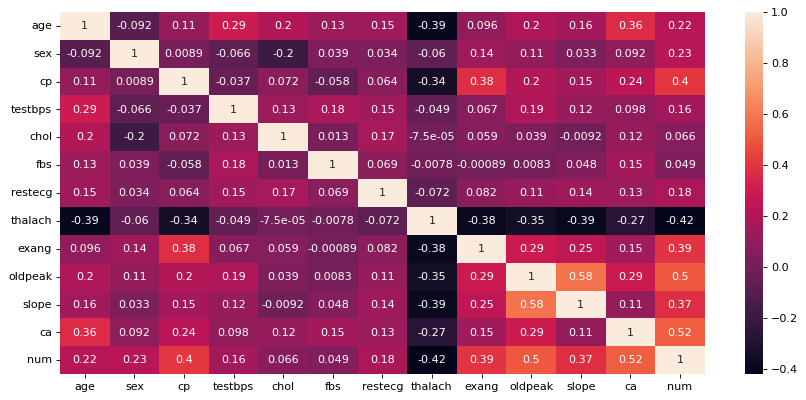

In [38]:
plt.figure(figsize=(13, 6), dpi=80)
sns.heatmap(cleveland.corr(), annot=True)
plt.show()

Now that we see all the correlation between the variables we can begin by searching if there are any outliers in the data that may affect the models we are looking to train.

c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

[Text(0.5, 0, '')]

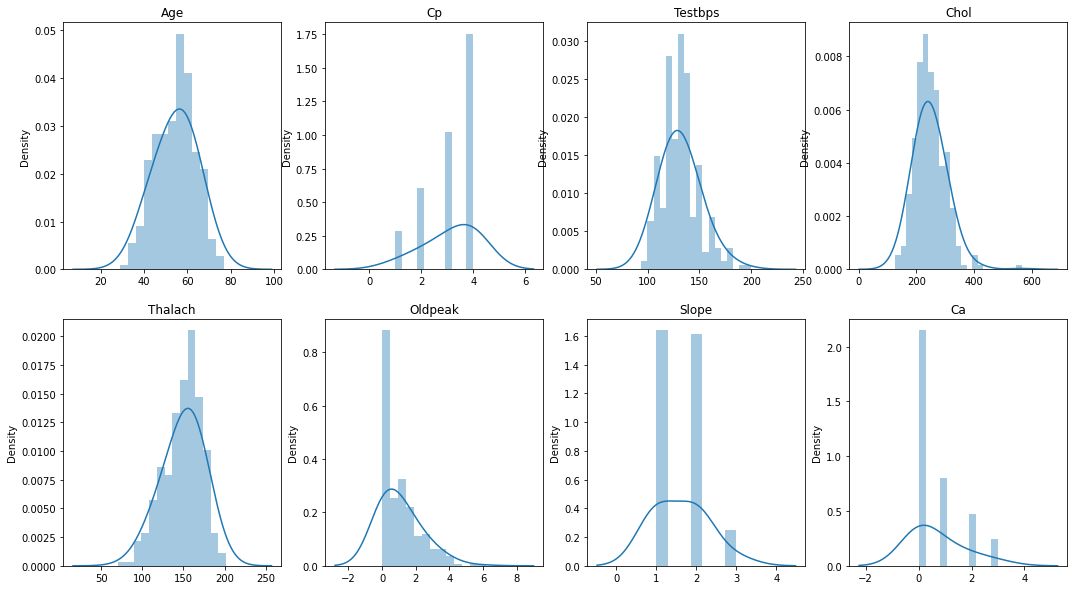

In [87]:
# from seaborn_qqplot import pplot
figure, ax = plt.subplots(2,4,figsize=(18,10))
sns.distplot(x =cleveland.age ,ax=ax[0,0], kde=True, kde_kws={'bw':0.8})
ax[0,0].set_title('Age')
ax[0,0].set(xlabel=None)
sns.distplot(x=cleveland.cp, ax=ax[0,1], kde=True, kde_kws={'bw':0.8})
ax[0,1].set_title('Cp')
ax[0,1].set(xlabel=None)
sns.distplot(x=cleveland.testbps, ax=ax[0,2], kde=True, kde_kws={'bw':0.8})
ax[0,2].set_title('Testbps')
ax[0,2].set(xlabel=None)
sns.distplot(x=cleveland.chol, ax=ax[0,3], kde=True, kde_kws={'bw':0.8})
ax[0,3].set_title('Chol')
ax[0,3].set(xlabel=None)
sns.distplot(x=cleveland.thalach, ax=ax[1,0], kde=True, kde_kws={'bw':0.8})
ax[1,0].set_title('Thalach')
ax[1,0].set(xlabel=None)
sns.distplot(x=cleveland.oldpeak, ax=ax[1,1], kde=True, kde_kws={'bw':0.8})
ax[1,1].set_title('Oldpeak')
ax[1,1].set(xlabel=None)
sns.distplot(x=cleveland.slope, ax=ax[1,2], kde=True, kde_kws={'bw':0.8})
ax[1,2].set_title('Slope')
ax[1,2].set(xlabel=None)
sns.distplot(x=cleveland.ca, ax=ax[1,3], kde=True, kde_kws={'bw':0.8})
ax[1,3].set_title('Ca')
ax[1,3].set(xlabel=None)

[Text(0, 0.5, '')]

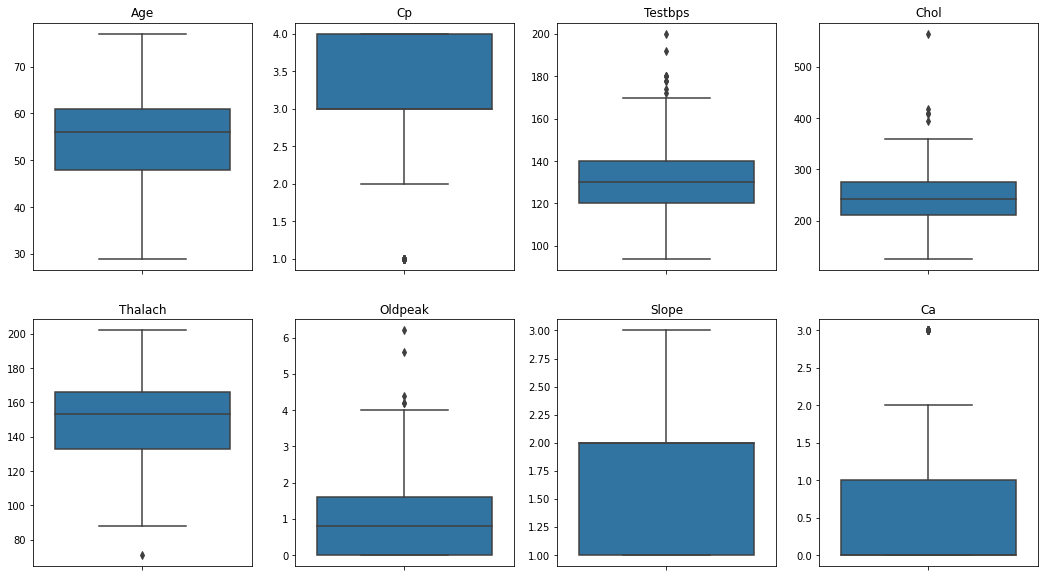

In [47]:
figure, ax = plt.subplots(2,4,figsize=(18,10))
sns.boxplot(y=cleveland.age, ax=ax[0,0])
ax[0,0].set_title('Age')
ax[0,0].set(ylabel=None)
sns.boxplot(y=cleveland.cp, ax=ax[0,1])
ax[0,1].set_title('Cp')
ax[0,1].set(ylabel=None)
sns.boxplot(y=cleveland.testbps, ax=ax[0,2])
ax[0,2].set_title('Testbps')
ax[0,2].set(ylabel=None)
sns.boxplot(y=cleveland.chol, ax=ax[0,3])
ax[0,3].set_title('Chol')
ax[0,3].set(ylabel=None)
sns.boxplot(y=cleveland.thalach, ax=ax[1,0])
ax[1,0].set_title('Thalach')
ax[1,0].set(ylabel=None)
sns.boxplot(y=cleveland.oldpeak, ax=ax[1,1])
ax[1,1].set_title('Oldpeak')
ax[1,1].set(ylabel=None)
sns.boxplot(y=cleveland.slope, ax=ax[1,2])
ax[1,2].set_title('Slope')
ax[1,2].set(ylabel=None)
sns.boxplot(y=cleveland.ca, ax=ax[1,3])
ax[1,3].set_title('Ca')
ax[1,3].set(ylabel=None)

The variables that were not included in this graph are variables that contain boolean values, as such there is no need to plot this variables to check if there are any outliers, for we can easily find those with the unique function from the pandas library.

## PCA

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

We need to change the values of num from a categorical variable to a boolean value that represents wheter the patient presents heart diseas of not.

In [41]:
cleveland.dtypes

age           int32
sex         float64
cp          float64
testbps     float64
chol        float64
fbs         float64
restecg       int32
thalach       int32
exang       float64
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [52]:
# bol_df = cleveland.iloc[:,[1,5,8]]
X = cleveland.iloc[:,[0,2,3,4,6,7,9,10,11,12]]
# X = cleveland.iloc[:,0:13]
y = cleveland.iloc[:,13]
std = StandardScaler()
transformed = StandardScaler().fit_transform(X)


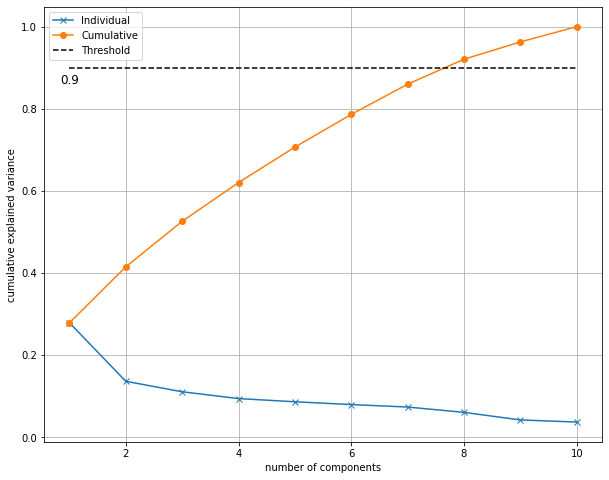

In [53]:
thres = 0.9
plt.figure(figsize=(10,8))
pca = PCA().fit(transformed)
plt.grid(visible=True)
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'x-')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.plot([1,len(pca.explained_variance_ratio_)],[thres, thres],'k--')
plt.text(1, thres-0.04, f"{thres}", ha="center", fontsize=12)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend(['Individual','Cumulative','Threshold'])
plt.show()

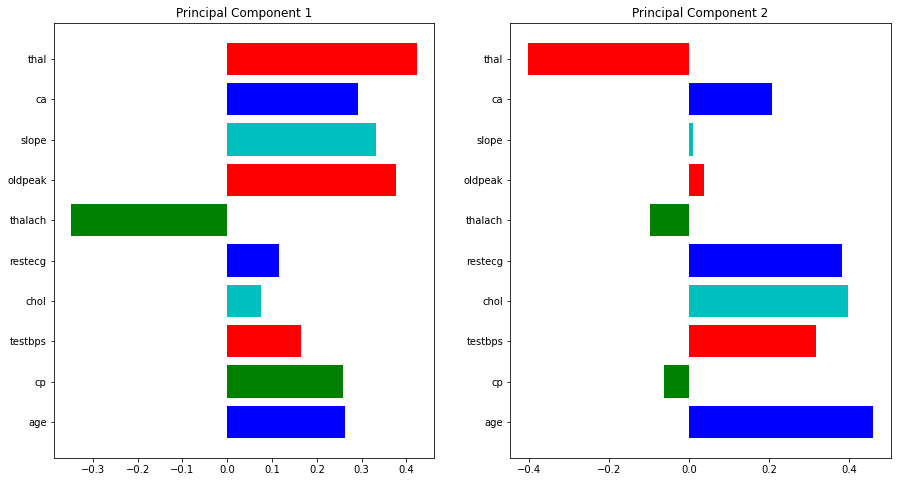

In [44]:
feature_weights = pca.components_
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.barh(X.columns,feature_weights[0],color=['b','g','r','c'])
ax2.barh(X.columns,feature_weights[1],color=['b','g','r','c'])
ax1.set_title('Principal Component 1')
ax2.set_title('Principal Component 2')
# ax1.xlabel()
plt.show()

In [45]:
feature_weights[10]

array([-5.93639959e-17, -7.49161752e-19, -4.37119621e-17, -6.69565103e-17,
        9.60703855e-18, -5.66746046e-17,  1.51560403e-16,  5.95439467e-17,
        1.99571677e-16, -7.07106781e-01,  7.07106781e-01])

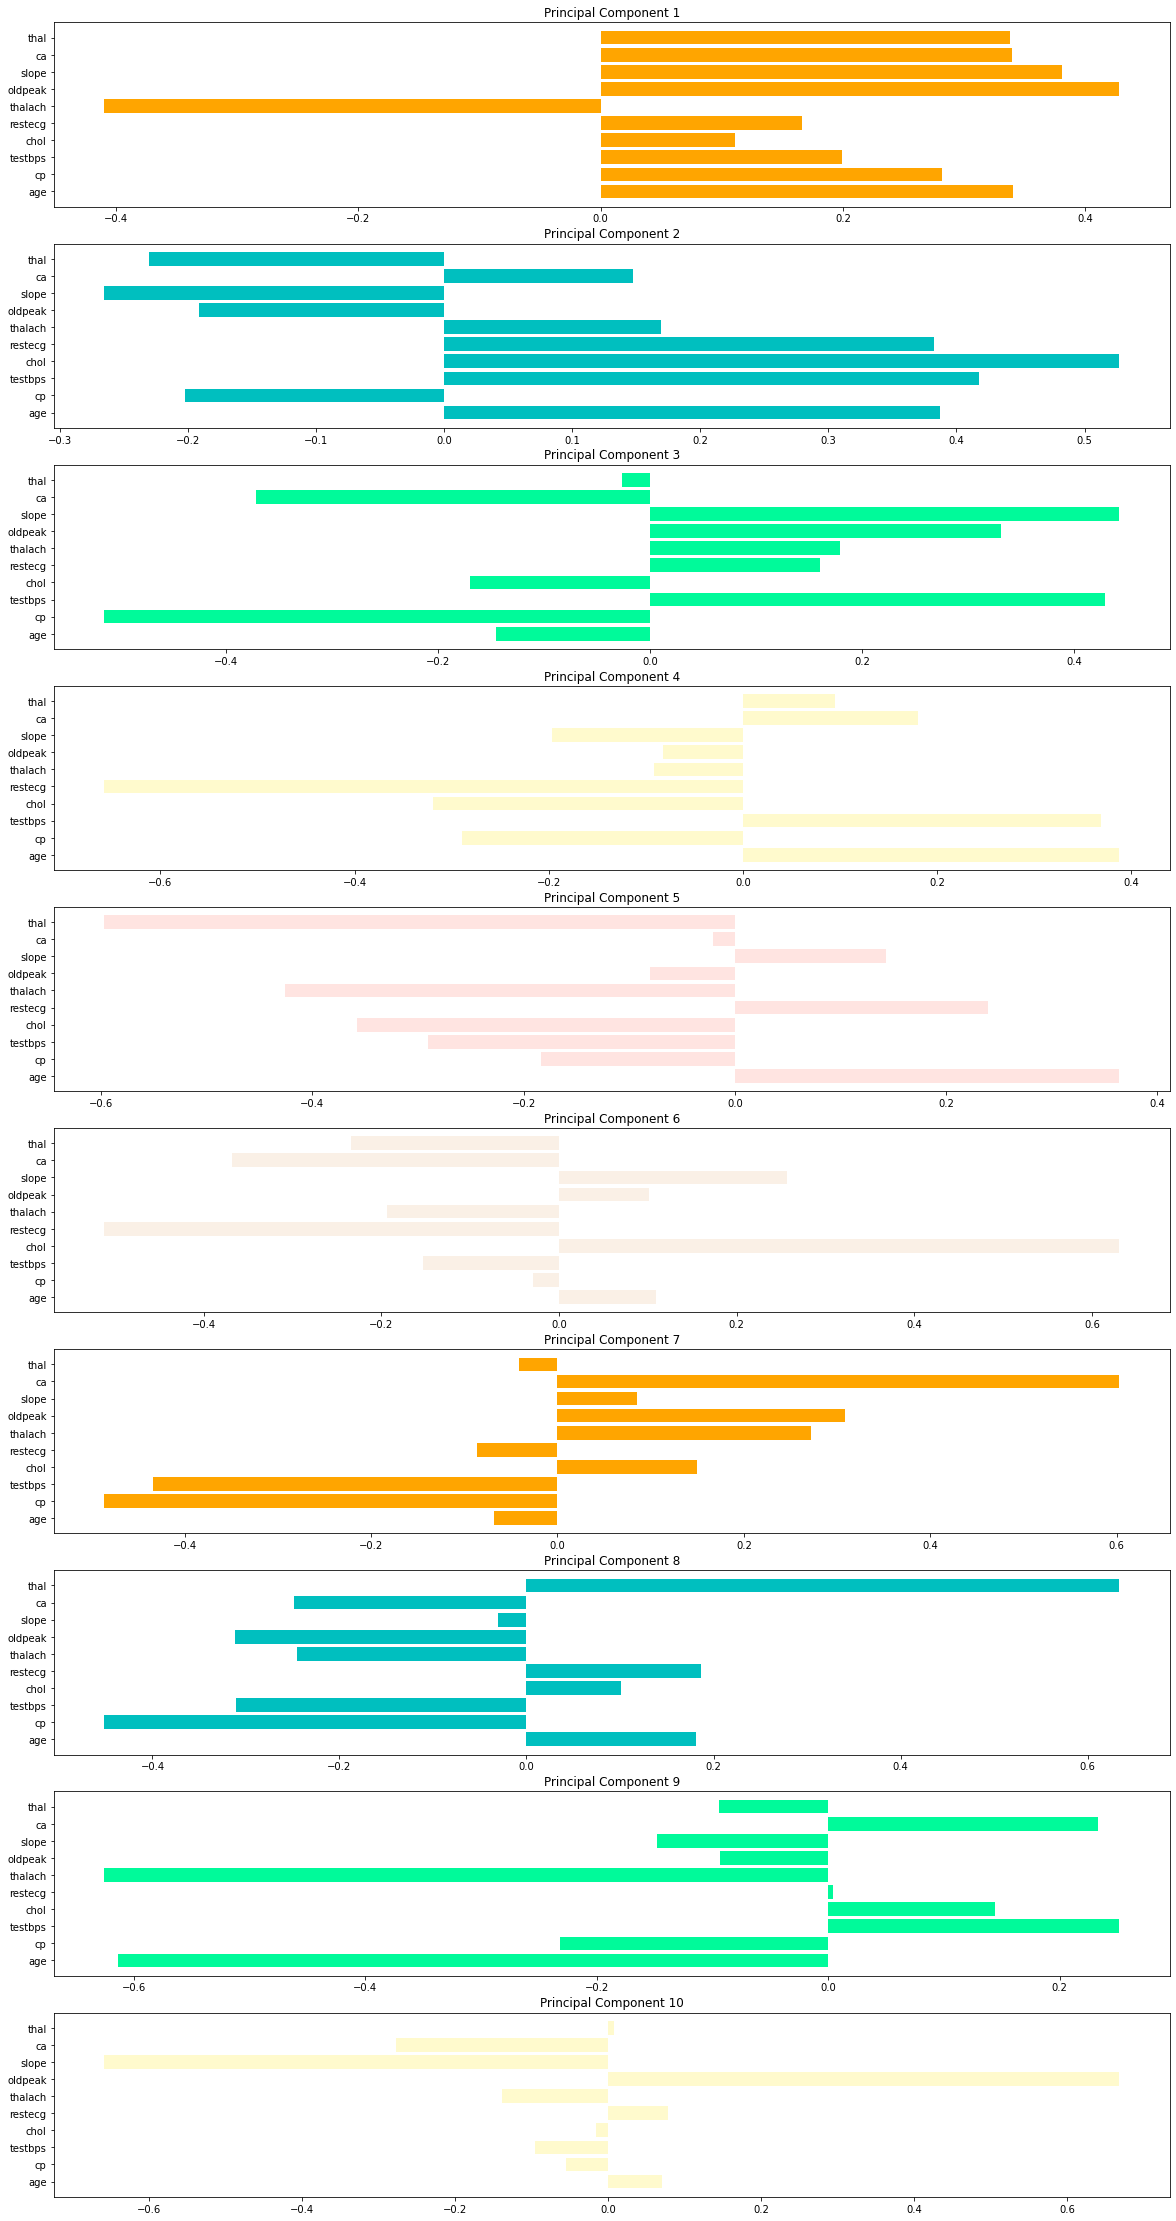

In [54]:
import seaborn as sns
feature_weights = pca.components_
# plt.figure(figsize=(13,1))
colors = ['orange', 'c', 'mediumspringgreen', 'lemonchiffon','mistyrose','linen','orange', 'c', 'mediumspringgreen', 'lemonchiffon','mistyrose','linen','orange']
fig, ax = plt.subplots(10,1, figsize=(20,40))
for i in range(len(feature_weights)):
    ax[i].barh(X.columns, feature_weights[i], color=colors[i])
    ax[i].set_title(f'Principal Component {i+1}')
# ax[1].barh(X.columns, feature_weights[1], color=colors[1])
# ax[1].set_title(f'Principal Component {2}')
# ax[2].barh(X.columns, feature_weights[2], color=colors[2])
# ax[2].set_title(f'Principal Component {3}')
    
# plt.barh(X.columns,feature_weights[0],color=['orange'], label='Principal Component 1')
# plt.barh(X.columns,feature_weights[1],color=['c'], label='Principal Component 2')
# plt.barh(X.columns,feature_weights[2],color=['mediumspringgreen'], label='Principal Component 3')
# plt.legend()
# ax1.xlabel()
plt.show()

In [56]:
len(X.columns)

10

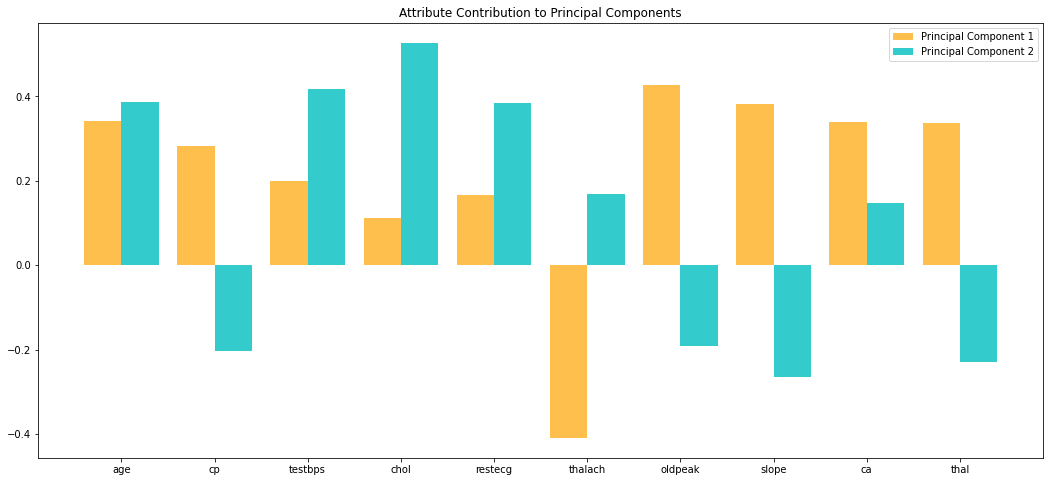

In [55]:
import seaborn as sns
feature_weights = pca.components_
plt.figure(figsize=(18,8))
# fig, ax = plt.subplots(figsize=(15,8))
X_axis = np.arange(len(X.columns))
plt.bar(X_axis - 0.2,feature_weights[0],0.4,color='orange', label='Principal Component 1', alpha=0.7)
plt.bar(X_axis + 0.2,feature_weights[1],0.4,color='c', label='Principal Component 2', alpha=0.8)
plt.xticks(X_axis, X.columns)
# sns.barplot(y=X.columns,x=feature_weights[2],color='mediumspringgreen', label='Principal Component 3',alpha=0.8)
plt.legend()
plt.title('Attribute Contribution to Principal Components')
# ax1.xlabel()
plt.show()

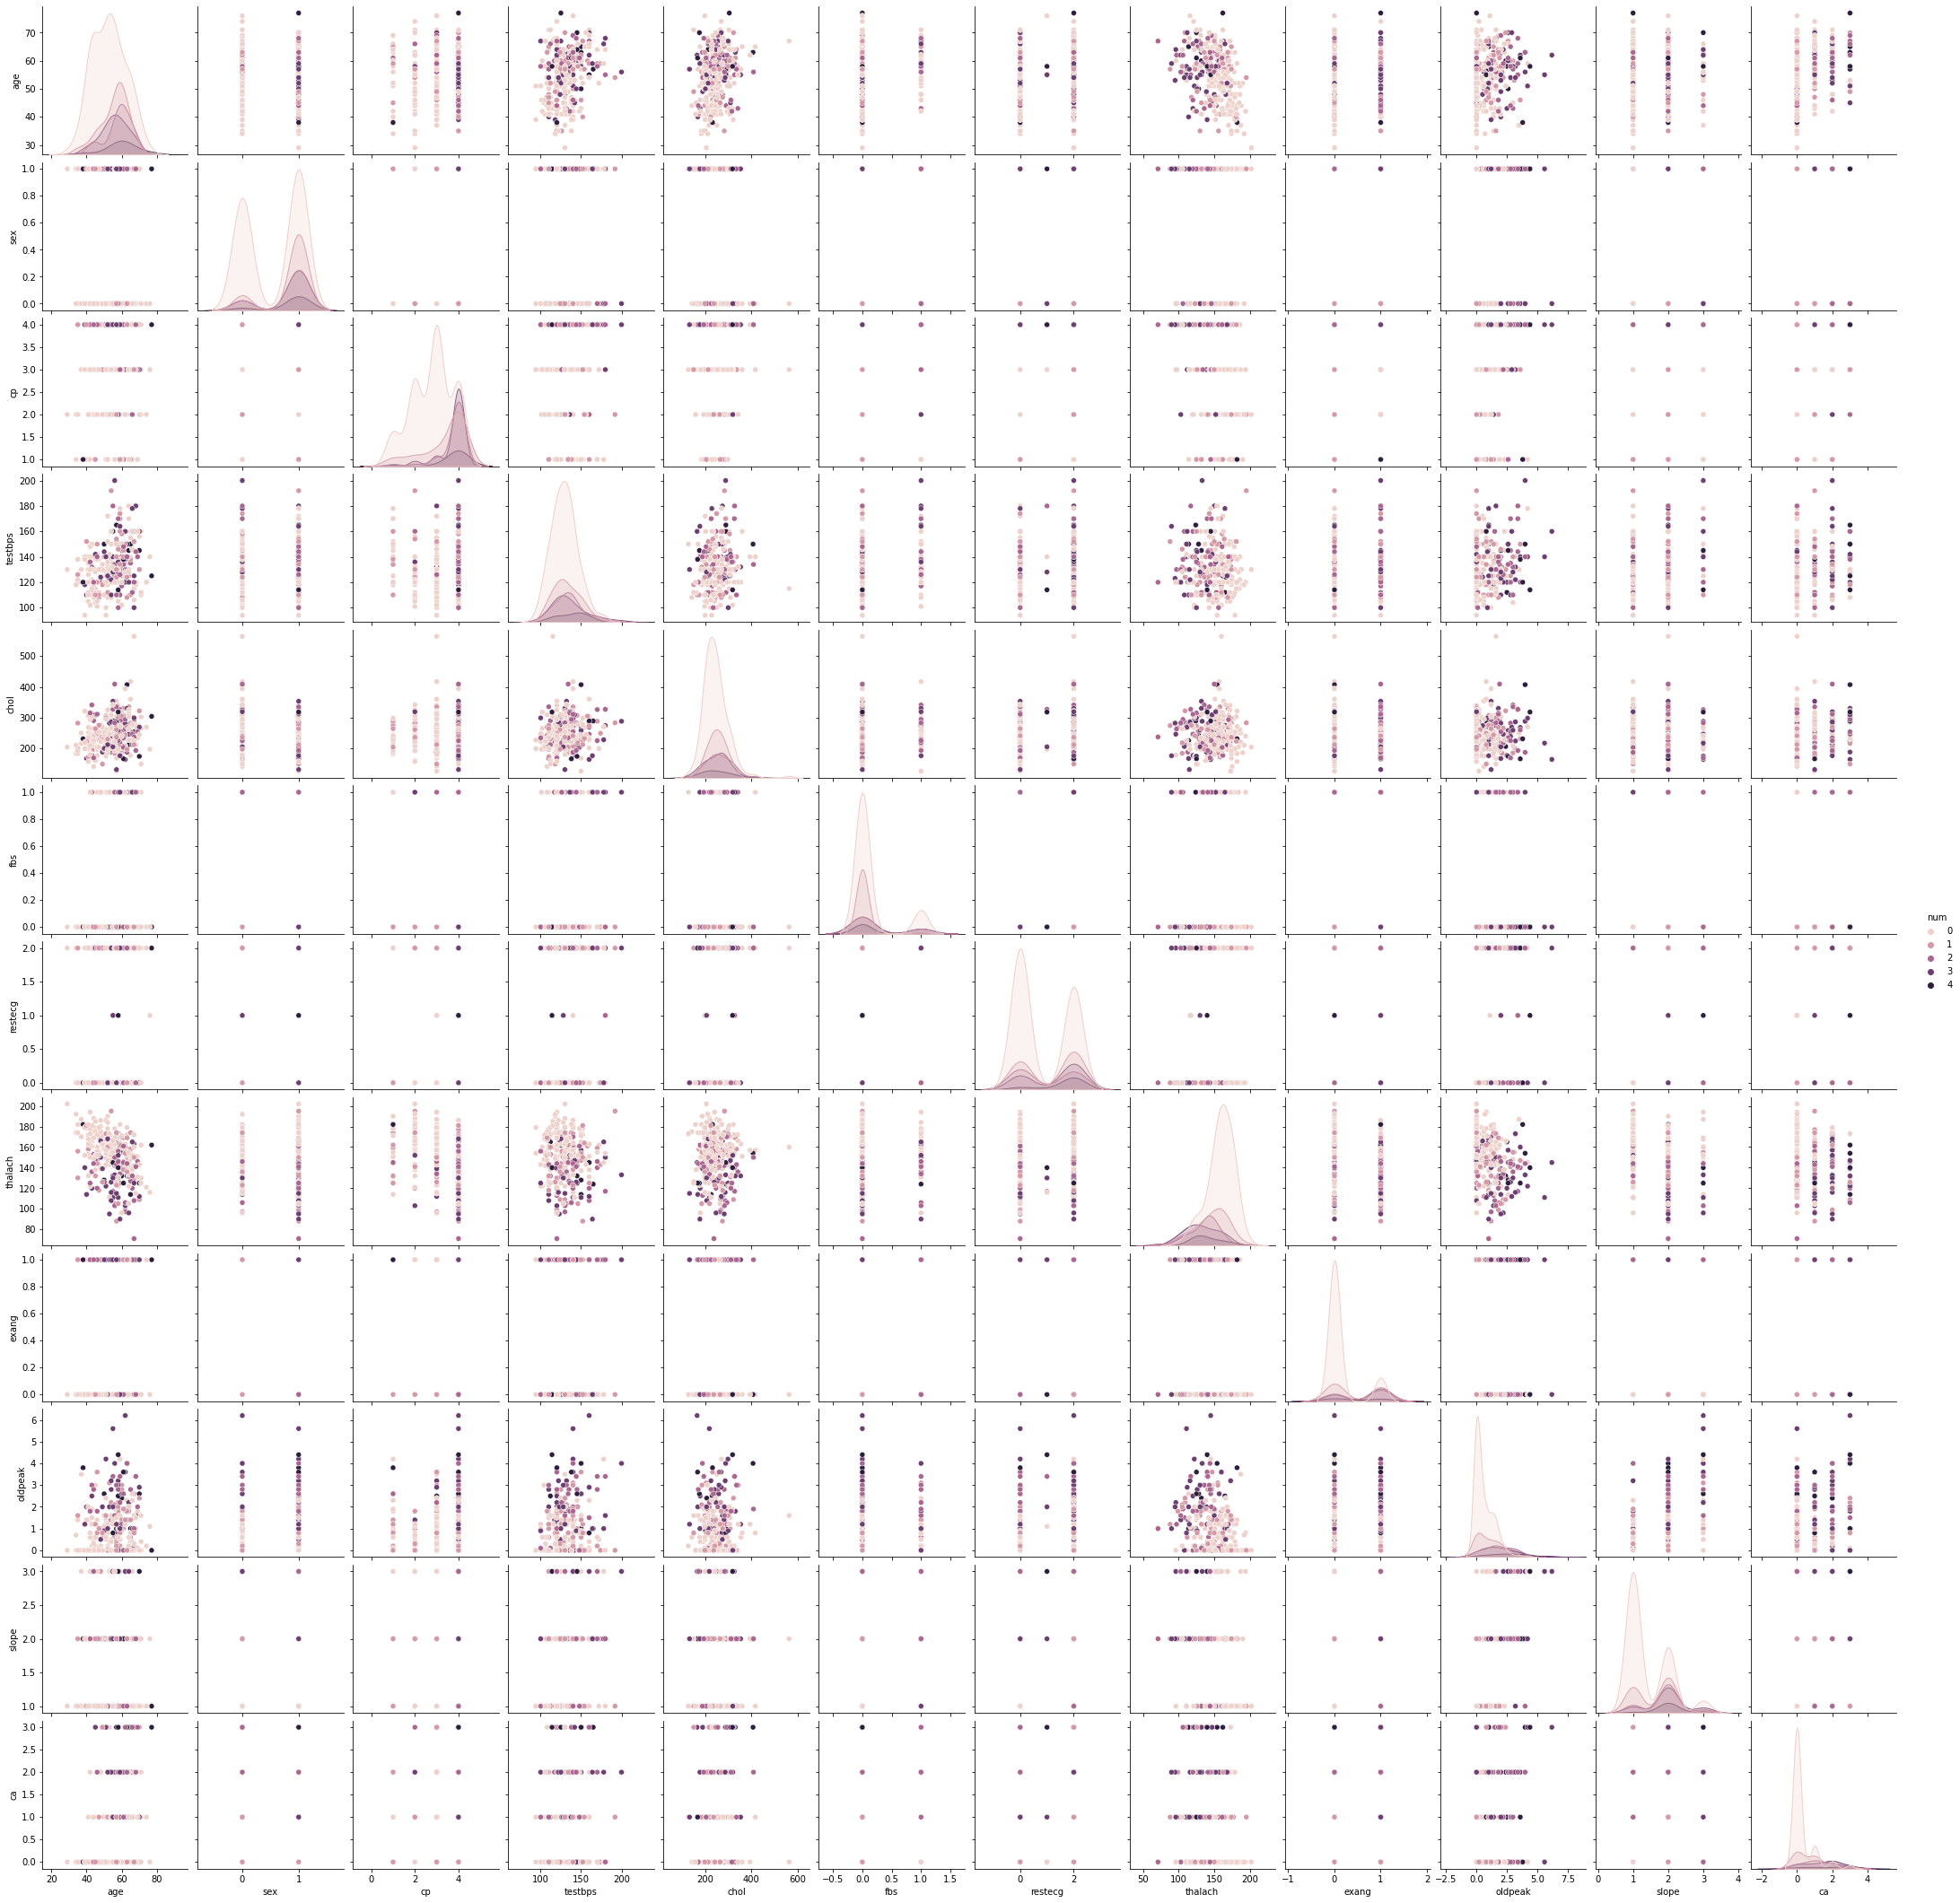

In [57]:
sns.pairplot(cleveland,hue='num')

(-1.0999986683139165,
 1.099999936586377,
 -1.0999969878536957,
 1.0999995243978122)

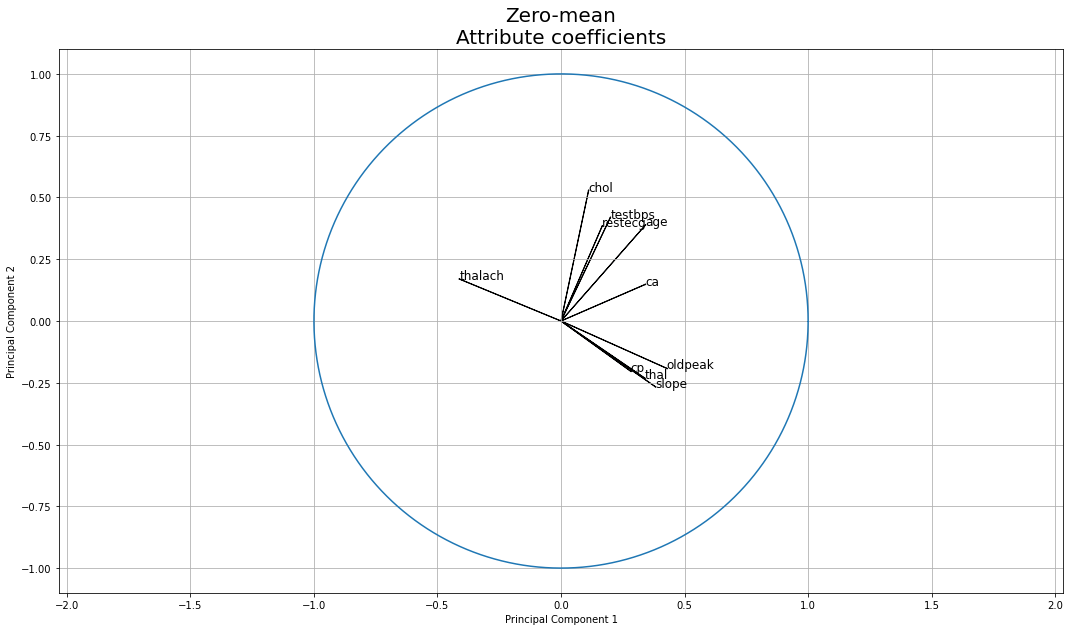

In [58]:
plt.figure(figsize=(18,10))
for pc in range(1):
    for att in range(len(feature_weights[pc])):
        plt.arrow(0,0, feature_weights[pc,att], feature_weights[pc+1,att])
        plt.text(feature_weights[pc,att], feature_weights[pc+1,att], X.columns[att], fontsize=12)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(visible=True)
    # Add a unit circle
plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
plt.title('Zero-mean' +'\n'+'Attribute coefficients', fontsize=20)
plt.axis('equal')

#### Clases

In [59]:
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [60]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

In [61]:
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

In [62]:
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

In [63]:
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

#### Plot

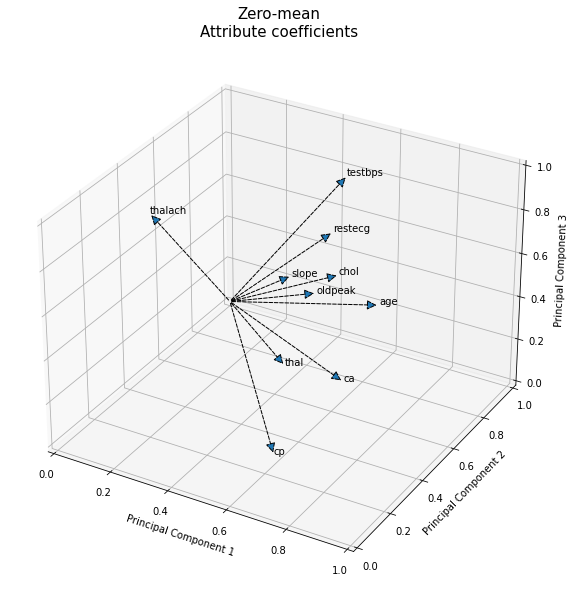

In [64]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

pc=0
X_ax = []
Y_ax = []
Z_ax = []
for att in range(len(feature_weights[pc])):
    ax.arrow3D(0,1,0,
       feature_weights[pc,att],feature_weights[pc+1,att],feature_weights[pc+2,att],
       mutation_scale=20,
    #    ec='mediumspringgreen',
       arrowstyle="-|>",
       linestyle='dashed')
    ax.annotate3D(X.columns[att], (feature_weights[pc,att],feature_weights[pc+1,att]+1,feature_weights[pc+2,att]), xytext=(feature_weights[pc,att],feature_weights[pc+1,att]), textcoords='offset points')       
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Zero-mean' +'\n'+'Attribute coefficients', fontsize=15)
plt.show()

In [ ]:
cleveland.dtypes

age           int32
sex            bool
cp         category
testbps     float64
chol        float64
fbs            bool
restecg       int32
thalach       int32
exang          bool
oldpeak     float64
slope         int32
ca          float64
thal       category
num           int64
dtype: object

In [ ]:
# X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principal_ca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.components_)
principalDf = pd.DataFrame(data = principal_ca
             , columns = ['principal component 1', 'principal component 2'])

[0.74624358 0.14978765]
[[ 3.71370255e-02 -1.79005215e-03  1.33755739e-03  5.13057125e-02
   9.97979636e-01  1.12947261e-04  3.21099961e-03 -1.92101713e-03
   5.52446142e-04  9.71782236e-04 -6.72615371e-05  2.16014706e-03
   5.33092114e-04]
 [ 1.81679674e-01  1.06635004e-03  1.36066367e-02  1.15430612e-01
  -1.46608251e-02  4.90865160e-04  3.75427015e-03 -9.75728823e-01
   7.66510858e-03  1.82343510e-02  1.05192679e-02  1.16488194e-02
   2.38408185e-02]]


In [ ]:
pca_df = pd.concat([principalDf, y], axis=1)
pca_df.rename(columns={'num':'target'}, inplace=True)

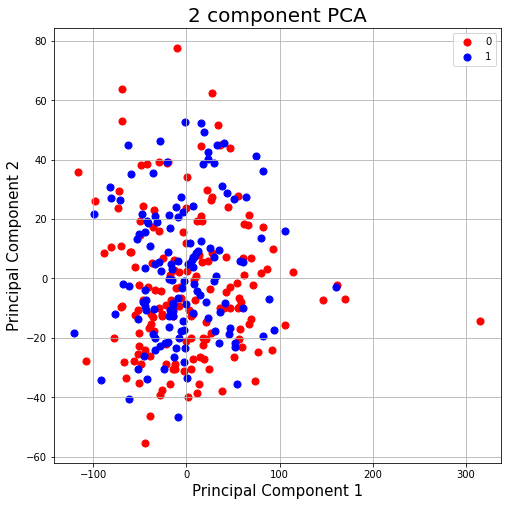

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['target'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Linear Regression

In [88]:
cleveland.num = [0 if x ==0 else 1 for x in cleveland.num]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [90]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)

c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(
c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.55098707201692

In [91]:
reg.coef_

array([-1.28316360e-02,  2.83174323e-01,  4.16109412e-03, -3.19098694e-04,
        1.35170128e-01, -7.92941127e-03,  1.17128739e-01,  2.15572894e-01,
        4.35210907e-01,  1.65796241e-01])

In [92]:
reg.intercept_

-0.24137545583458653

In [93]:
y_pred = reg.predict(X_test)
print('MAE: {:1.8f}'.format(mean_absolute_error(y_test, y_pred)))
print('MSE: {:1.8f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:1.8f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

MAE: 0.64649864
MSE: 0.74648579
RMSE: 0.86399409


c:\Users\guzma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [95]:
import numpy as np

def jaccard_binary(x,y):
    """A function for finding the similarity between two binary vectors"""
    intersection = np.logical_and(x, y)
    union = np.logical_or(x, y)
    similarity = intersection.sum() / float(union.sum())
    return similarity

# Define some binary vectors
x = [1,1,1,1,1,1,1,1,0,0,0,0,0]
y = [1,0,0,1,0,0,0,0,1,1,1,1,1]

# Find similarity among the vectors
simxy = jaccard_binary(x,y)

print(' Similarity between x and y is', simxy)

 Similarity between x and y is 0.15384615384615385
